In [2]:
#Importing Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.set_printoptions(threshold=np.inf)

In [3]:
#Getting dataFrame
dataFrame = pd.read_csv("insurance.csv")

In [4]:
##Analyzing Dataframe

In [5]:
dataFrame.head() # 7 columns with a numerical target <charges>

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dataFrame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
dataFrame.isna().sum() #There is no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
numFeatures = [column for column in dataFrame.columns if dataFrame[column].dtypes!="object" and column!="charges"] 
catFeatures = [column for column in dataFrame.columns if dataFrame[column].dtypes=="object" and column!="charges"]
print("Numerical Featuers ==> ",numFeatures)
print("Categorical Features ==> ",catFeatures)

Numerical Featuers ==>  ['age', 'bmi', 'children']
Categorical Features ==>  ['sex', 'smoker', 'region']


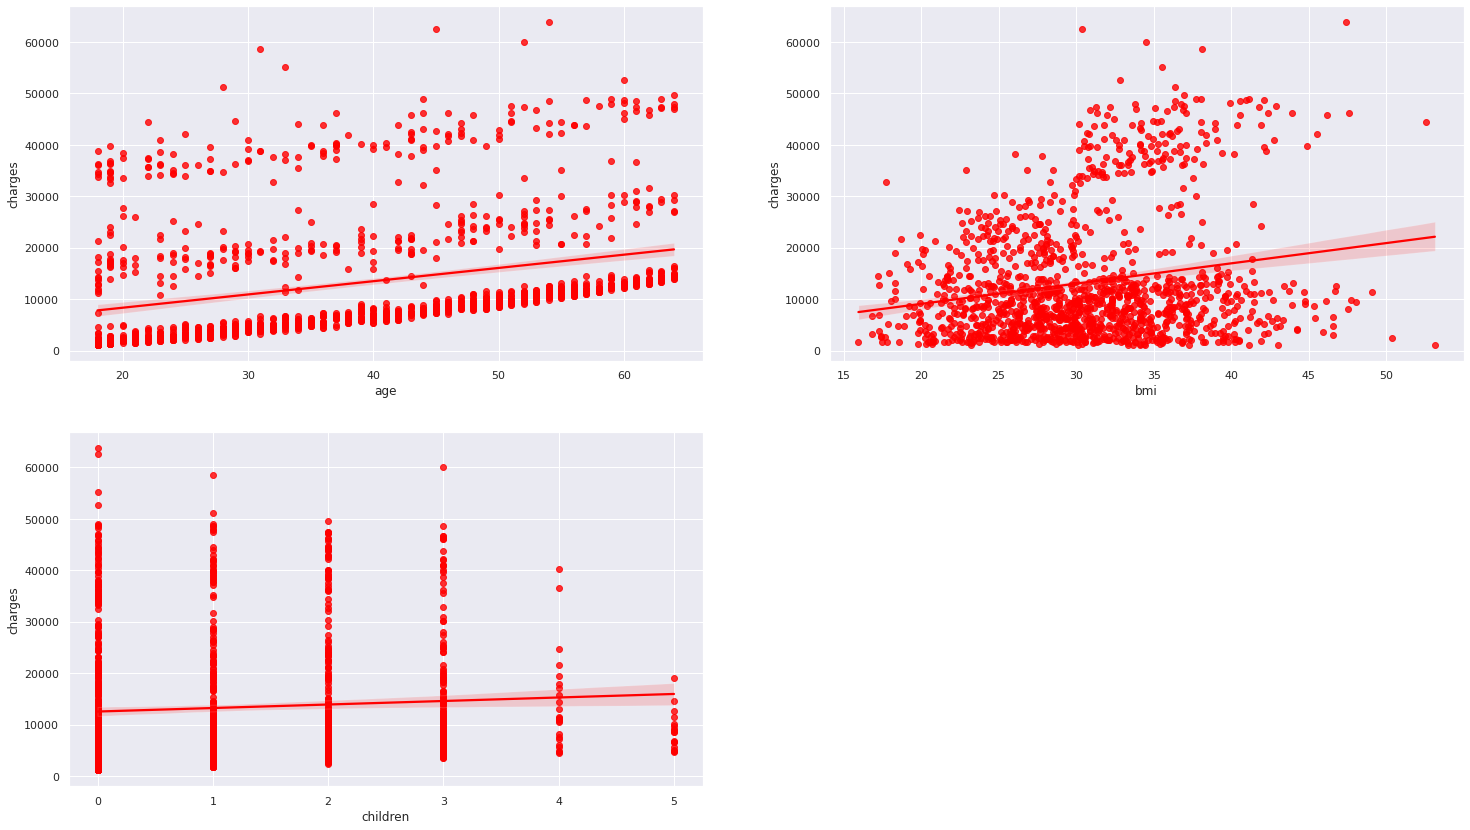

In [10]:
#Analyzing relationship between numerical variables and target
sns.set_theme(palette="winter")
plt.figure(figsize=(25,30))
i=1
for column in numFeatures:
    plt.subplot(4,2,i)
    sns.regplot(x=column,y="charges",data=dataFrame,color="r")
    plt.xlabel(column)
    i+=1
    
plt.show()

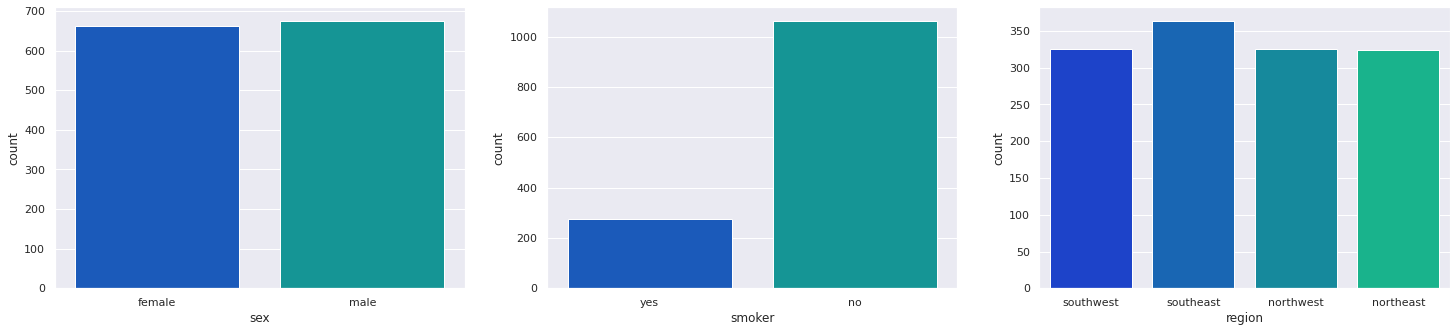

In [11]:
#Analyzing relationship between nominal variables and target
sns.set_theme()
plt.figure(figsize=(25,30))
i=1
for column in catFeatures:
    plt.subplot(5,3,i)
    sns.countplot(x=column,data=dataFrame,palette="winter")
    plt.xlabel(column)
    i+=1
    
plt.show()

In [12]:
## Data Preprocessing

In [13]:
X = dataFrame.iloc[:,:-1].values #Features
y = dataFrame.iloc[:,-1].values #Target

In [14]:
catVars = []

for i in range(0,len(dataFrame.columns)-1):
    if dataFrame.dtypes[i] == "object":
        #catVars.append(dataFrame.columns[i])
        catVars.append(i)
print(catVars)

[1, 4, 5]


In [15]:
#[column for column in catVars if len(dataFrame[dataFrame.columns[column]].unique())==2]
#LabelEncoding X
from sklearn.preprocessing import LabelEncoder

Xtransformed = X
labelEncoder = LabelEncoder()

for column in catVars:
    if len(dataFrame[dataFrame.columns[column]].unique())==2:
        Xtransformed[:,column] = labelEncoder.fit_transform(Xtransformed[:,column]) 

In [16]:
#OneHotEncoding X
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

colTrans = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[column for column in catVars if len(dataFrame[dataFrame.columns[column]].unique())>2])],remainder="passthrough")
Xtransformed = np.array(colTrans.fit_transform(Xtransformed))

In [17]:
#New X
Xtransformed

array([[0.0, 0.0, 0.0, 1.0, 19, 0, 27.9, 0, 1],
       [0.0, 0.0, 1.0, 0.0, 18, 1, 33.77, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 28, 1, 33.0, 3, 0],
       [0.0, 1.0, 0.0, 0.0, 33, 1, 22.705, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 32, 1, 28.88, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 31, 0, 25.74, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 46, 0, 33.44, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 37, 0, 27.74, 3, 0],
       [1.0, 0.0, 0.0, 0.0, 37, 1, 29.83, 2, 0],
       [0.0, 1.0, 0.0, 0.0, 60, 0, 25.84, 0, 0],
       [1.0, 0.0, 0.0, 0.0, 25, 1, 26.22, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 62, 0, 26.29, 0, 1],
       [0.0, 0.0, 0.0, 1.0, 23, 1, 34.4, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 56, 0, 39.82, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 27, 1, 42.13, 0, 1],
       [0.0, 0.0, 0.0, 1.0, 19, 1, 24.6, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 52, 0, 30.78, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 23, 1, 23.845, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 56, 1, 40.3, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 30, 1, 35.3, 0, 1],
       [1.0, 0.0, 0.0, 0

In [18]:
#Splitting datasets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(Xtransformed,y,test_size=0.1,random_state=42)

In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Scaling X
numVars = [4,6,7]
scalerX1 = StandardScaler()
scalerX2 = StandardScaler()

#Age Column
X_train[:,4:5] = scalerX1.fit_transform(X_train[:,4:5])
X_test[:,4:5] = scalerX1.transform(X_test[:,4:5])

#BMI Column
X_train[:,6:7] = scalerX2.fit_transform(X_train[:,6:7])
X_test[:,6:7] = scalerX2.transform(X_test[:,6:7])

#Scaling y
scalerY = StandardScaler()

y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

y_train = scalerY.fit_transform(y_train)
y_test = scalerY.transform(y_test)

In [20]:
print(X_test[0,:])
print(X_test[0])
print(y_test[0])
print(scalerX1.inverse_transform(np.array(X_test[0,4]).reshape(-1,1)))
print(scalerY.inverse_transform(np.array(y_test[0]).reshape(-1,1)))

[1.0 0.0 0.0 0.0 0.41159743644527985 0 -0.8803305142849296 2 0]
[1.0 0.0 0.0 0.0 0.41159743644527985 0 -0.8803305142849296 2 0]
[-0.34799768]
[[45.]]
[[9095.06825]]


In [21]:
#Applying the Linear Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train.ravel())

LinearRegression()

In [60]:
#Predicting a new result
print(scalerY.inverse_transform(regressor.predict(np.array([1.0,0.0,0.0,0.0,0.41,0,-0.8803,2,0]).reshape(1,-1)).reshape(1,-1)))

[[9057.70730092]]


In [71]:
#R^2 SCORE
from sklearn.metrics import r2_score

print(r2_score(y_test.ravel(),regressor.predict(X_test)))

0.765034338123542
